[PCCP 모의고사 #1] 4번 - [운영체제](https://school.programmers.co.kr/learn/courses/20847/lessons/255903)

In [78]:
from collections import deque

def solution(program):
    end_time = [0]
    wait_time = [0] * 10
    
    program = sorted(program, key=lambda x: (-x[1], -x[0])) # 호출시각을 기준으로 재정렬

    current = 0
    jobs = deque([])
    
    while program :
        print('\nbefore:', program)
        while program:
            next_job = program.pop()
            if next_job[1] <= current:
                jobs.append(next_job)
            else :
                next_call = next_job[1]
                program.append(next_job)
                break
            
        jobs = deque(sorted(list(jobs), key=lambda x : (x[0])))
        print(f'jobs: {jobs}')
            
        while jobs:
            job = jobs.popleft()
            if current < next_call:
                job_time = job[2]
                wait_time[job[0]-1] += current - job[1]
                print(f'현재 작업({job})은 {job[1]}초에 호출되어, {current}에 시작되었습니다. {job[0]}에 {current-job[1]}만큼 가산합니다')
                current += job_time
            elif not program:
                job_time = job[2]
                wait_time[job[0]-1] += current - job[1]
                print(f'현재 작업({job})은 {job[1]}초에 호출되어, {current}에 시작되었습니다. {job[0]}에 {current-job[1]}만큼 가산합니다')
                current += job_time
                # print('scout:', jobs, program, job)
            else :
                jobs.append(job)
                break  
        
        print('after:', program, next_call, next_job)
        
    end_time = [current]
     
    answer = end_time + wait_time
    return answer

In [79]:
program = [[2, 0, 10], [1, 5, 5], [3, 5, 3], [3, 12, 2]]
solution(program)


before: [[3, 12, 2], [3, 5, 3], [1, 5, 5], [2, 0, 10]]
jobs: deque([[2, 0, 10]])
현재 작업([2, 0, 10])은 0초에 호출되어, 0에 시작되었습니다. 2에 0만큼 가산합니다
after: [[3, 12, 2], [3, 5, 3], [1, 5, 5]] 5 [1, 5, 5]

before: [[3, 12, 2], [3, 5, 3], [1, 5, 5]]
jobs: deque([[1, 5, 5], [3, 5, 3]])
현재 작업([1, 5, 5])은 5초에 호출되어, 10에 시작되었습니다. 1에 5만큼 가산합니다
after: [[3, 12, 2]] 12 [3, 12, 2]

before: [[3, 12, 2]]
jobs: deque([[3, 5, 3], [3, 12, 2]])
현재 작업([3, 5, 3])은 5초에 호출되어, 15에 시작되었습니다. 3에 10만큼 가산합니다
현재 작업([3, 12, 2])은 12초에 호출되어, 18에 시작되었습니다. 3에 6만큼 가산합니다
after: [] 12 [3, 12, 2]


[20, 5, 0, 16, 0, 0, 0, 0, 0, 0, 0]

In [80]:
program = [[3, 6, 4], [4, 2, 5], [1, 0, 5], [5, 0, 5]]
solution(program)


before: [[3, 6, 4], [4, 2, 5], [5, 0, 5], [1, 0, 5]]
jobs: deque([[1, 0, 5], [5, 0, 5]])
현재 작업([1, 0, 5])은 0초에 호출되어, 0에 시작되었습니다. 1에 0만큼 가산합니다
after: [[3, 6, 4], [4, 2, 5]] 2 [4, 2, 5]

before: [[3, 6, 4], [4, 2, 5]]
jobs: deque([[4, 2, 5], [5, 0, 5]])
현재 작업([4, 2, 5])은 2초에 호출되어, 5에 시작되었습니다. 4에 3만큼 가산합니다
after: [[3, 6, 4]] 6 [3, 6, 4]

before: [[3, 6, 4]]
jobs: deque([[3, 6, 4], [5, 0, 5]])
현재 작업([3, 6, 4])은 6초에 호출되어, 10에 시작되었습니다. 3에 4만큼 가산합니다
현재 작업([5, 0, 5])은 0초에 호출되어, 14에 시작되었습니다. 5에 14만큼 가산합니다
after: [] 6 [3, 6, 4]


[19, 0, 0, 4, 3, 14, 0, 0, 0, 0, 0]

- 논리적으론 맞췄으나 과다한 시간이 소모됨

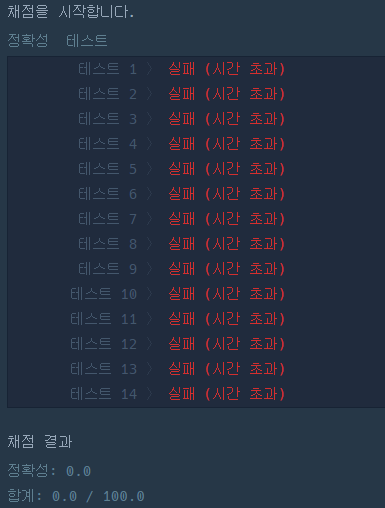

In [ ]:
from collections import deque

def solution(program):
    end_time = [0]
    wait_time = [0] * 10
    
    program = sorted(program, key=lambda x: (-x[1], -x[0])) # 호출시각을 기준으로 재정렬

    current = 0
    jobs = deque([])
    
    while program :
        while program:
            next_job = program.pop()
            if next_job[1] <= current:
                jobs.append(next_job)
            else :
                next_call = next_job[1]
                program.append(next_job)
                break
            
        jobs = deque(sorted(list(jobs), key=lambda x : (x[0])))
            
        while jobs:
            job = jobs.popleft()
            if current < next_call:
                job_time = job[2]
                wait_time[job[0]-1] += current - job[1]
                current += job_time
            elif not program:
                job_time = job[2]
                wait_time[job[0]-1] += current - job[1]
                current += job_time
            else :
                jobs.append(job)
                break  
        
    end_time = [current]
     
    answer = end_time + wait_time
    return answer

- 실행속도 문제를 해결하기 위해 최소 힙을 구현하는 heapq로 대체

In [126]:
import heapq

def solution(program):    
    # (우선순위, 호출시각, 작업시간) -> (호출시각, 우선순위, 작업시간)으로 변경
    program = [[call_time, score, duration] for [score, call_time, duration] in program]
    heapq.heapify(program)

    current_time = 0
    delay_time = [0]*10
    
    next_call = 0
    
    jobs = []
    heapq.heapify(jobs)
    while program :
        while program:
            call_time, score, duration = heapq.heappop(program)            
            if current_time >= call_time:
                heapq.heappush(jobs, [score, call_time, duration])
            else:
                next_call = call_time
                heapq.heappush(program, [call_time, score, duration])
                break

        while jobs:
            score, call_time, duration = heapq.heappop(jobs)
            if current_time == call_time == 0:
                current_time += duration
            elif current_time < next_call:
                delay_time[score-1] += current_time - call_time
                current_time += duration
            elif not program:
                delay_time[score-1] += current_time - call_time
                current_time += duration                
            else :
                heapq.heappush(jobs, [score, call_time, duration])
                break
    
    return [current_time]+delay_time

In [127]:
program = [[2, 0, 10], [1, 5, 5], [3, 5, 3], [3, 12, 2]]
solution(program)

[20, 5, 0, 16, 0, 0, 0, 0, 0, 0, 0]

In [128]:
program = [[3, 6, 4], [4, 2, 5], [1, 0, 5], [5, 0, 5]]
solution(program)

[19, 0, 0, 4, 3, 14, 0, 0, 0, 0, 0]

- heapq 자료구조를 이용해 최적화

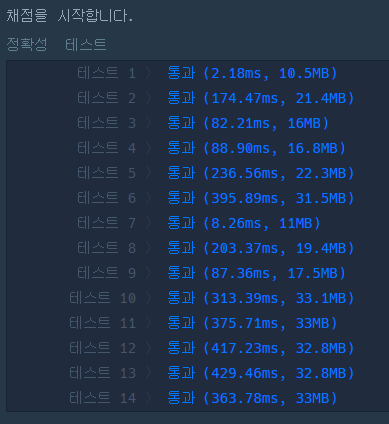

- heapq를 통해 최소 힙을 구현하고, 이를 통해 힙에 추가되는 값들도 자동으로 고려해서 정렬되도록 함  
  (이를 위해서 jobs에서는 score를 1순위 기준으로 변경)
- 기존 코드에서 뺐다 넣었다 하는 작업이 반복되므로, 이러한 작업을 직접 조회하는 방식으로 수정  
  (힙의 첫 번째 값의 호출시각을 조회)

In [ ]:
import heapq

def solution(program):
    # 초기 설정: 프로그램을 호출 시각 기준으로 최소 힙 구성
    program = [(call_time, score, duration) for score, call_time, duration in program]
    heapq.heapify(program)

    current_time = 0  # 현재 시간
    delay_time = [0] * 10  # 각 우선순위별 대기 시간

    jobs = []  # 실행 대기 중인 작업

    while program or jobs:
        # 현재 시간 이전에 호출된 모든 작업을 jobs에 추가
        while program and program[0][0] <= current_time:
            call_time, score, duration = heapq.heappop(program)
            heapq.heappush(jobs, (score, call_time, duration))

        if not jobs:
            # 대기 중인 작업이 없다면, 다음 프로그램 호출 시간으로 현재 시간 업데이트
            current_time = program[0][0]
        else:
            # 대기 중인 작업 처리
            score, call_time, duration = heapq.heappop(jobs)
            delay_time[score-1] += max(0, current_time - call_time)  # 대기 시간 업데이트
            current_time += duration  # 현재 시간 업데이트

    return [current_time] + delay_time


[PCCP 모의고사 #2] 1번 - [실습용 로봇](https://school.programmers.co.kr/learn/courses/20848/lessons/255904)

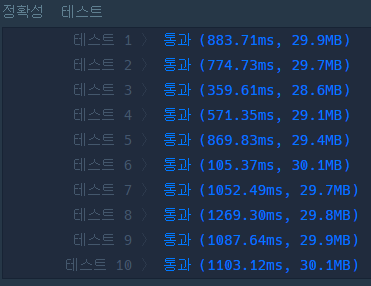

In [42]:
import numpy as np

def solution(command):
    answer = np.array([0, 0])
    
    directions = np.array([(0,1), (1,0), (0,-1), (-1,0)])
    cur = 0
    cnt = 0
    for c in command:
        if c not in ['R', 'L']:
            cnt += 1 if c == 'G' else -1
        else :
            answer += cnt * directions[cur]
            cnt = 0
            cur += 1 if c == 'R' else -1
            cur = 3 if cur == -1 else cur % 4

    if cnt != 0 :
        answer += cnt * directions[cur]     
        
    return answer.tolist()

In [43]:
command = "GRGLGRG"
solution(command)

[2, 2]

In [44]:
command = "GRGRGRB"
solution(command)

[2, 0]

- 다른 풀이 방법

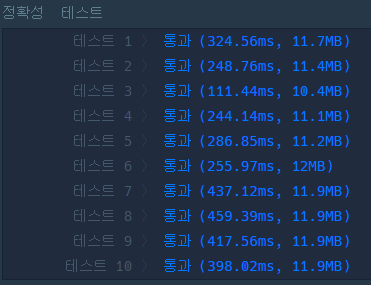

In [ ]:
from collections import deque

def solution(commands):
    dx = [0, 1, 0, -1]
    dy = [1, 0, -1, 0]
    queue = deque()
    queue.append([0 ,1, 0]) # x, y, 방향
    robot = [0, 0]
    for command in commands:
        if command == 'R': 
            _, _, d = queue.pop()
            queue.append([dx[(d + 1)%4], dy[(d + 1)%4], (d+1)%4])
            continue
        if command == 'L' :
            _, _, d = queue.pop()
            queue.append([dx[(d - 1)%4], dy[(d - 1)%4], (d - 1) % 4])
            continue
        if command == 'G':
            ax, ay, d = queue[-1]
            robot[0], robot[1] = ax + robot[0], ay + robot[1]
            continue
        if command == 'B':
            ax, ay, _ = [-value for value in queue[-1]]
            robot[0], robot[1] = ax + robot[0], ay + robot[1]
            continue
    return robot

- 기존에 푼 방법 중에서 numpy가 벡터연산에 최적화돼 있으나, 작은 데이터 세트에 대해서는 순수 python 연산보다 오버헤드가 클 수 있다는 점을 고려,  
  기존 풀이 방식에서 numpy를 쓰지 않고 푸는 식으로 변경

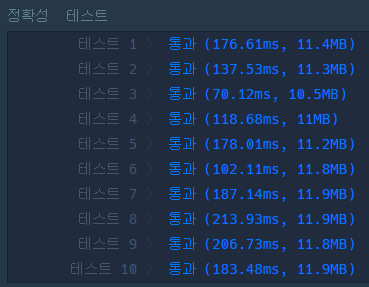

In [47]:
def solution(command):
    answer = [0, 0]
    
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    cur = 0
    cnt = 0
    for c in command:
        if c not in ['R', 'L']:
            cnt += 1 if c == 'G' else -1
        else:
            dx, dy = directions[cur]
            answer[0] += cnt * dx
            answer[1] += cnt * dy
            cnt = 0
            if c == 'R':
                cur = (cur + 1) % 4
            else:
                cur = (cur - 1) % 4

    if cnt != 0:
        dx, dy = directions[cur]
        answer[0] += cnt * dx
        answer[1] += cnt * dy

    return answer


In [49]:
command = "GRGLGRG"
solution(command)

[2, 2]

In [50]:
command = "GRGRGRB"
solution(command)

[2, 0]